In [1]:
#|default_exp app


In [2]:
#|export

from fastai.vision.all import *
import gradio as gr

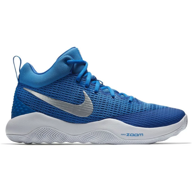

In [12]:
im = PILImage.create('nike.jpg')
im.thumbnail((192, 192))
im

In [13]:
#|export

learn = load_learner('model.pkl')

In [14]:
learn.predict(im)

('nike',
 tensor(3),
 tensor([0.0043, 0.0033, 0.0505, 0.8185, 0.0176, 0.1035, 0.0024]))

In [15]:
categories = learn.dls.vocab#('adidas', 'converse', 'new balance', 'nike', 'puma', 'sketchers', 'vans')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    #print(f"Prediction: {pred}, Index: {idx}, Probabilities: {probs}")
    return dict(zip(categories, map(float, probs)))

In [16]:
classify_image(im)

Prediction: nike, Index: 3, Probabilities: tensor([0.0043, 0.0033, 0.0505, 0.8185, 0.0176, 0.1035, 0.0024])


{'adidas': 0.004292717203497887,
 'converse': 0.0032522769179195166,
 'new balance': 0.05049186572432518,
 'nike': 0.8185414671897888,
 'puma': 0.017571618780493736,
 'sketchers': 0.10347871482372284,
 'vans': 0.002371343085542321}

In [ ]:
image = gr.Image()
label = gr.Label()
examples = ['nike.jpg', 'adidas.jpg', 'new balance.jpg', 'converse.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Prediction: nike, Index: 3, Probabilities: tensor([2.1161e-03, 3.6605e-04, 2.5534e-02, 8.6597e-01, 1.8775e-03, 1.0352e-01,
        6.1431e-04])


Prediction: puma, Index: 4, Probabilities: tensor([0.1679, 0.0826, 0.0155, 0.0143, 0.3942, 0.1933, 0.1322])


Prediction: new balance, Index: 2, Probabilities: tensor([3.5961e-04, 1.7785e-04, 9.9804e-01, 7.1894e-05, 2.0402e-05, 1.2535e-03,
        8.0440e-05])


Prediction: converse, Index: 1, Probabilities: tensor([5.1812e-09, 9.9986e-01, 3.1236e-05, 2.1461e-07, 6.1402e-08, 1.4200e-06,
        1.0421e-04])


Prediction: converse, Index: 1, Probabilities: tensor([1.6460e-05, 9.9905e-01, 1.1114e-07, 1.8907e-05, 4.2351e-06, 7.5503e-07,
        9.1309e-04])


Prediction: converse, Index: 1, Probabilities: tensor([1.4144e-02, 8.5692e-01, 7.7616e-04, 1.4538e-03, 2.9191e-04, 1.3191e-02,
        1.1323e-01])


Prediction: vans, Index: 6, Probabilities: tensor([2.6582e-01, 2.1039e-01, 2.5656e-05, 1.1982e-02, 4.1410e-03, 4.9505e-05,
        5.0759e-01])
